# Attacks on the proportional noise / flattening mechanism

This notebook looks at attacks on proprotional noise / flattening that assume that there are very specific data conditions and that the attacker knows it. The data conditions require a certain small number of extreme contributors. The data conditions are not realistic, so we do this to understand the absolute worst case.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from IPython.display import display
import sys
stdout = sys.stdout
import os
filePath = globals()['_dh'][0]
parDir = os.path.abspath(os.path.join(filePath, os.pardir))
print(parDir)
sys.path.append(parDir)

with open('betaData.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame.from_dict(data)
df['CR'] = pd.to_numeric(df['CR'])
df['CI'] = pd.to_numeric(df['CI'])
df['C'] = pd.to_numeric(df['C'])
df['alphbet'] = df['alphbet'].apply(str)
df['outParams'] = df['outParams'].apply(str)

c:\paul\GitHub\attacker\diffixElmPaperAttacks


In [8]:

display(df.head())

,C,CI,CR,SD,Unknown Vals,alphbet,claims,outParams,thresh
0,0.23,0.042,1.000000,2.25,5,"[2, 2]",100000,"[[2, 3], [3, 4]]",1.000000
1,0.25,0.057,1.000000,2.25,5,"[2, 4]",100000,"[[2, 3], [3, 4]]",1.000000
2,0.25,0.065,1.000000,2.25,5,"[2, 8]",10000,"[[2, 3], [3, 4]]",1.000000
3,1.05,1.050,0.000003,2.25,5,"[2, 2]",3,"[[2, 3], [3, 4]]",1.150414
4,0.43,0.290,0.000014,2.25,5,"[2, 4]",14,"[[2, 3], [3, 4]]",1.163440


In [9]:
df.describe()

,C,CI,CR,SD,Unknown Vals,claims,thresh
count,35.00000,35.000000,3.500000e+01,35.00,35.000000,35.000000,35.000000
mean,0.44380,0.259114,7.714291e-01,2.25,7.657143,12857.628571,1.033352
std,0.35041,0.403522,4.260420e-01,0.00,7.483090,22171.688869,0.066199
min,0.07300,0.024000,1.000000e-07,2.25,2.000000,0.000000,1.000000
25%,0.16400,0.042000,1.000000e+00,2.25,2.000000,10000.000000,1.000000
50%,0.26000,0.059000,1.000000e+00,2.25,5.000000,10000.000000,1.000000
75%,0.54000,0.089500,1.000000e+00,2.25,12.500000,10000.000000,1.000000
max,1.05000,1.050000,1.000000e+00,2.25,20.000000,100000.000000,1.259120


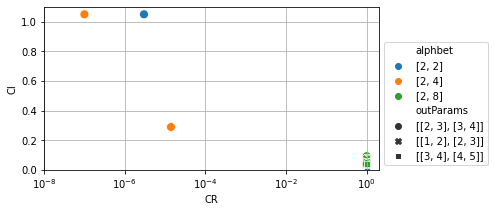

In [10]:
plt.figure(figsize=(6, 3))
ax = sns.scatterplot(data=df, x="CR", y="CI",hue='alphbet',style='outParams',s=80)
ax.set(xscale='log')
ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.0), ncol=1)
plt.xlim(0.00000001,2)
plt.ylim(0,1.1)
plt.grid()